# Lab 1 Exercises for COMP 6321 Machine Learning

This is a Jupyter Notebook.

When you opened it, the Jupyter server started a new Python interpreter to run the code you type in the cells.

* **To edit a code cell**, click inside its text box. A green border should appear.
* **To run the selected cell**, hit Ctrl+Enter.

Try typing `3+4` into the cell below and run it with Ctrl+Enter. You should see `7` appear in the output. <!--XALKJS-->

In [1]:
3+4

7

This lab notebook has three types of cells:
1. **Instruction cells** explain what you're supposed to do; don't bother trying to edit them, even though you can select them.
2. **Code cells for answers** are where you should write your code answers, after reading the instructions.
3. **Code cells for checking answers** come with code and can be run to help you check your answer, if applicable.

Before attempting the exercises, you should have already read the [Lab1 overview](lab1.html) document.

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

## 1. Python language exercises

Exercises 1.1&ndash;1.4 help to asses your understanding of the Python programming language and how it works. They assume intermediate-level Python expertise, so beginners will find them very challenging, but that is OK &mdash; keep learning until they make sense! Use the [Python language review](python.html) and ask TAs for help.

<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.1 &ndash; Python variables, objects, and references
The [Python language review](python.html) for this course contains a diagram of how a list object holds references to the other objects that are "in" the list. Go look at the example diagram in the "List" section.

Now consider the diagram below:
![image](img/fig-list-references-exercise.png)
It depicts two list objects, an integer object, a float object, and a string object.

**Write Python code** that creates objects in memory as depicted in the diagram, including the references shown. Write your code in the cell below. Aim for 3 lines of code, and try not to create any extra (temporary) objects not shown.

In [2]:
x = [1, 2.0, '+3']
y = [x[-1]]
y.append(y)

**Check your answer** by running the code cell below.

In [3]:
assert 'x' in globals(), "You didn't define variable 'x'"
assert 'y' in globals(), "You didn't define variable 'y'"
assert isinstance(x, list), "Variable 'x' should refer to a list object"
assert isinstance(y, list), "Variable 'y' should refer to a list object"
assert len(x) == 3, "The list object referred to by 'x' should have length 3"
assert len(y) == 2, "The list object referred to by 'y' should have length 2"
assert isinstance(x[0], int)   and x[0] == 1,   "Slot x[0] should refer to an int object with value 1"
assert isinstance(x[1], float) and x[1] == 2.0, "Slot x[1] should refer to a float object with value 2.0"
assert isinstance(x[2], str)   and x[2] == '+3', "Slot x[2] should refer to a string object with value '+3'"
assert y[0] is x[2], "Slot y[0] should refer to the same object as slot x[2]"
assert y[1] is y,    "Slot y[1] should refer to the same list object that variable 'y' does"
print('Correct!')

Correct!


<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.2 &ndash; Filtering a Python list
Suppose you are given a sequence _x_ containing numbers. You are asked to write a function that returns a new sequence containing only those items that were _strictly above_ a certain threshold. In other words, your function should 'filter' the sequence according to a threshold.

**Write three versions of the function:**
1. The first version should use a standard Python for-loop and return a list. Aim for 5 lines of code inside the function.
2. The second version should use list comprehension and return a list. Aim for 1 line.
3. The third version should use the built-in _filter_ function to return an iterator. Aim for 1 or 2 lines.

Enter all three answers in the code cell below.

In [4]:
def filter1(x, threshold):
    z = []
    for i in x:
        if i > threshold:
            z += [i]
    return z

def filter2(x, threshold):

    return [i for i in x if i>threshold]

def filter3(x,threshold):
    return filter(lambda x: x > threshold, x)

**Check your answer** by running the code cell below.

In [5]:
x = [1, 9, 2, 8, 3, 7, 4, 6, 5]
for threshold in range(10):
    y = filter1(x, threshold)
    assert isinstance(y, list), "filter1 was supposed to return a list object"
    assert len(y) == len(x) - threshold, "filter1 returned wrong number of items"
    assert all([yi > threshold for yi in y])
for threshold in range(10):
    y = filter2(x, threshold)
    assert isinstance(y, list), "filter2 was supposed to return a list object"
    assert len(y) == len(x) - threshold, "filter2 returned wrong number of items"
    assert all([yi > threshold for yi in y])
for threshold in range(10):
    y = filter3(x, threshold)
    assert isinstance(y, filter), "filter3 was supposed to return a filter object"
    y_greater = [yi > threshold for yi in y]
    assert len(y_greater) == len(x) - threshold, "filter3's sequence had the wrong number of items"
    assert all(y_greater)
print("Correct!")

Correct!


<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.3 &ndash; Storing a Python dictionary to a file

Suppose you ran a machine learning experiment and found that the following configuration worked best:

```
learning_rate = 0.01
training_steps = 350
weight_decay = 0.05
```

(Don't worry about what these variable names actually mean, you will by the end of the course.)

**Write code to save these settings in a file.** You should put the above values in a Python dictionary object, then save the object to a file called `exercise13.pkl` using the `pickle` module. See the "Serialization" section of the [Python language review](python.html) for an example.

(Note that in practice it's better and more secure to store human-readable configurations as a JSON file, rather than a binary format like pickle, but start by learning pickle!)

In [6]:
learning_rate = 0.01
training_steps = 350
weight_decay = 0.05

import pickle
exercise13 = {'learning_rate':learning_rate,'training_steps':training_steps,'weight_decay':weight_decay}
with open('exercise13.pkl', 'wb') as f:           # Open a file for writing in binary mode
    pickle.dump(exercise13, f) 


with open('exercise13.pkl', 'rb') as f:           # Later on, open the file for reading in binary mode
    exercise13 = pickle.load(f)                   # Deserialize the object from the pickle file
exercise13

{'learning_rate': 0.01, 'training_steps': 350, 'weight_decay': 0.05}

**Check your answer** by running the code cell below.

In [7]:
assert 'pickle' in globals(), "You forgot to import the pickle module!"
import os
assert os.path.exists('exercise13.pkl'), "File 'exercise13.pkl' doesn't seem to exist! Did you write it?"
with open('exercise13.pkl', 'rb') as f:
    config = pickle.load(f)
assert isinstance(config, dict), "Expected a single dictionary object in the file!"
assert len(config) == 3, "Expected 3 keys in the dictionary!"
for key, value in zip(('learning_rate', 'training_steps', 'weight_decay'), (0.01, 350, 0.05)):
    assert key in config, "Expected '%s' to be a key in the dictionary" % key
    assert config[key] == value, "Expected value for '%s' to be %s" % (key, value)
print("Correct!")

Correct!


<div style="border-bottom: 3px solid black;"></div>

### Exercise 1.4 &ndash; Python lambda functions and closures
Much of machine learning is based on computing derivatives. The derivative of $f(x)$ can be approximated by [_finite differences_](https://en.wikipedia.org/wiki/Finite_difference#Forward,_backward,_and_central_differences). Here is the _central difference:_

$$f'(x) = \lim_{\epsilon \rightarrow 0} \frac{f(x + \epsilon) - f(x - \epsilon)}{2\epsilon}$$

For sufficiently small $\epsilon$ the above fraction is a good approximation to $f'(x)$. (You should already know this stuff from introductory calculus.) In the computer, we'll use a small number like $\epsilon = 10^{-5}$. 

**Write a Python function** that accepts a function $f$ and returns a function that approximates $f'$ at any given $x$. Use Python's _lambda_ feature to define the new function that you return. Aim for 1 line of code inside the function.

In [8]:
def approx_derivative_of(f, epsilon=1e-5):
    """Returns a new function that approximates the derivative of f at any point.

    Arguments:
    f       -- the function f(x) whose derivative we wish to approximate
    epsilon -- the step size to use for central differencing (default 1e-5)
    """
    diff = lambda x: (f(x + epsilon) - f(x - epsilon))/(2 * epsilon)
    
    return diff

To play around with your answer, you can try running the code cell below for different values of _x_ or even for different functions.

In [9]:
def f(x):              # A function to compute x^3
    return x**3

def df_exact(x):       # A function to compute the exact derivative of f, which is 3x^2
    return 3 * x**2

df_approx = approx_derivative_of(f)  # A function to compute approximate derivative of f

x = 2.0
print(x, f(x), df_exact(x), df_approx(x))

2.0 8.0 12.0 12.00000000021184


**Check your answer** by running the code cell below

In [10]:
def f(x): return x**3
def df_exact(x): return 3 * x**2
df_approx = approx_derivative_of(f, 1e-15)

assert callable(df_approx), "You didn't return a function object!"
tests = [(0., 1.0000000000000003e-30), (1., 3.1641356201816957), (2., 11.990408665951689)]
for x, answer in tests:
    exact = df_exact(x)
    approx = df_approx(x)
    assert isinstance(approx, float), "Wrong type! Expected your function to return a float object"
    assert approx == answer, "Wrong value for approximation! Expected %s but got %s" % (answer, approx)
print("Correct!")

Correct!


<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black;"></div>

## 2. Numpy exercises

First, in the code cell below, write a line of code to import the Numpy package in the standard way, then run the code cell.

In [11]:
import numpy as np
from numpy.random import randint

If you imported Numpy correctly, you should be able to run the code cell below without error.

In [12]:
assert 'numpy' not in globals(), "You didn't import numpy the standard way. Do Kernel->Restart and then try again."
assert 'np' in globals(), "You didn't import numpy the standard way. Do Kernel->Restart and then try again."
print("Ready!")

Ready!


<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.1 &ndash; Numpy slicing and data sharing
The [Numpy review](numpy.html) for this course explains how Numpy arrays are represented in memory, and how multiple <code>ndarray</code> objects can share the same data in memory.

Consider the diagram below, depicting three ndarray objects and two chunks of array data:
![image](img/fig-exercise-ndarray-layout.png)

Notice that the strides attribute of the ndarray object referenced by *x*, *y*, and *z* are all different. You should understand why. For example, if you print *y*, the $-3$ and $-7$ elements are swapped from how they appear in the figure above:
```python
>>> y
array([[-2., -7.],
       [-3., -8.]], dtype=float32)

>>> z
array([[-2., -7.],
       [-3., -8.]], dtype=float32)
```

**Write Python code** that creates objects in memory as depicted in the diagram. Write your code in the cell below. Do NOT create any Python list objects in your solution, not even temporarily or as arguments to the *np.array* function. *Hint:* You should use the *arange*, slicing, transpose (*T*), negation, assignment, and *copy* operations provided by Numpy.

In [13]:
x = np.arange(0,15,dtype=np.float32).reshape(3,5)
x[0:2,2:4] = -x[0:2,2:4]
y = x[0:2,2:4]
y.strides = (4,20)
z = np.copy(y,order='C')

**Check your answer** by running the cell below.

In [14]:
assert 'x' in globals(), "You forgot to create a global variable 'x'!"
assert isinstance(x, np.ndarray), "x should be an ndarray object"
assert x.dtype == np.float32, "the dtype of x should be float32"
assert x.shape == (3, 5), "x shape is wrong"
assert x.strides == (20, 4), "x strides are wrong"
assert 'y' in globals(), "You forgot to create a global variable 'y'!"
assert isinstance(y, np.ndarray), "y should be an ndarray object"
assert y.dtype == np.float32, "the dtype of y should be float32"
assert y.shape == (2, 2), "y shape is wrong"
assert y.strides == (4, 20), "y strides are wrong"
assert x.sum() == 65, "the data for x seem wrong"
assert y.sum() == -20, "the data for y seems wrong"
assert 'z' in globals(), "You forgot to create a global variable 'z'!"
assert isinstance(z, np.ndarray), "z should be an ndarray object"
assert z.shape == (2, 2), "z shape is wrong"
assert z.strides == (8, 4), "z strides should be C-order (see np.copy)"
assert np.array_equal(z, y), "the data for z seems wrong"
assert np.may_share_memory(x, y), "y should be a view into x"
assert not np.may_share_memory(y, z), "z should have its own copy of the data"
print("Correct!")


Correct!


<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.2 &ndash; Use Numpy to write vectorized code
Suppose you are given the function below, where _x_ is a two-dimensional ndarray of numbers. You can assume _x_ is not empty (has at least one item).

In [15]:
def exercise22_loop(x):
    n, m = x.shape
    v = x[0,0]
    for i in range(n):
        for j in range(m):
            if x[i,j] > v:
                v = x[i,j]
    
    y = np.empty_like(x)
    for i in range(n):
        for j in range(m):
            y[i,j] = x[i,j] - v
            
    return y

You should know Python and Numpy well enough to figure out what the above code does.

**Write a new version of the function** that uses Numpy in a way that doesn't require Python for-loops. In other words, your solution should be completely _vectorized_. This is similar to writing good Matlab code. Write your answer in the code cell below. Aim for 1 line of code.

In [16]:
def exercise22_vectorized(x):
    return x - x.max()

**Check your answer** by running the code cell below.

In [17]:
assert 'exercise22_loop' in globals(), "You forgot to run the code cell with the loop-based code!"
assert 'exercise22_vectorized' in globals(), "You forgot to run the code cell with your answer!"
for i in range(10):
    x = np.random.randint(100, size=(5, 3))
    y = exercise22_vectorized(x)
    y_correct = exercise22_loop(x)
    assert isinstance(y, np.ndarray), "You didn't return an ndarray object!"
    assert y.shape == x.shape, "You returned an ndarray but of the wrong shape!"
    assert y.dtype == x.dtype, "You returned an ndarray but of the wrong dtype!"
    assert np.array_equal(y, y_correct), "Wrong result!\nx:\n%s\nexpected:\n%s\nreturned:\n%s" % (x, y_correct, y)
print("Correct!")

# import timeit
# x = np.random.randint(1000, size=(200, 200))
# loop_time = timeit.timeit('exercise22_loop(x)',      setup="from __main__ import exercise22_loop, x", number=10)
# vec_time = timeit.timeit('exercise22_vectorized(x)', setup="from __main__ import exercise22_vectorized, x", number=10)
# print("You vectorized code ran %.1fx faster than the original code on a 200x200 matrix" % (loop_time/vec_time))

Correct!


<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.3 &ndash; Check the quality of a solution to a linear system
Suppose you are given matrix $\mathbf{A} \in \mathbb{R}^{m\times n}$ and vector $\mathbf{b} \in \mathbb{R}^{m}$ and are told that $\mathbf{x} \in \mathbb{R}^{n}$ is a solution to the system of linear equations $\mathbf{A}\mathbf{x} = \mathbf{b}$.

**Write a Python function** that tests whether $\mathbf{x}$ is a solution to $\mathbf{A}\mathbf{x} = \mathbf{b}$. If we denote the $m$-dimensional vector of residuals as $\mathbf{r} = \mathbf{A}\mathbf{x}-\mathbf{b}$, then your function should return true if and only if *all* residuals $\lvert r_i \rvert \lt \epsilon$ for a given tolerance parameter $\epsilon$.

In [18]:
def is_solution(A, b, x, epsilon=1e-5):
    """Returns whether x is a solution to Ax=b, given an absolute tolerance on residuals."""
    return np.all(np.abs(np.matmul(A,x) - b) < epsilon)

**Check your answer** by running the cell below.

In [19]:
assert 'is_solution' in globals(), "You forgot to run the code cell with your answer!"
A = np.array([[2., 0.5], [-5., 3.]])
b = np.array([5., 9.])
x = np.array([1.23529, 5.05882])
result = is_solution(A, b, x)
assert isinstance(result, np.bool_), "Wrong result type! Expected single Numpy bool_ value, but was type %s" % type(result)
assert result, "Wrong answer! x is a solution within tolerance 1e-5"
result = is_solution(A, b, x, epsilon=1e-8)
assert isinstance(result, np.bool_), "Wrong result type! Expected single Numpy bool_ value, but was type %s" % type(result)
assert not result, "Wrong answer! x is not a solution within tolerance 1e-8"
print("Correct!")

Correct!


<div style="border-bottom: 3px solid black;"></div>

### Exercise 2.4 &ndash; Use random numbers to shuffle a pair of matrices together

Suppose you are given a pair of matrices $X \in \mathbb{R}^{m \times n}$ and $Y \in \mathbb{R}^{m \times k}$, and you must 'shuffle' their rows by the same permutation.

For example, consider the pair

$$
X = \begin{bmatrix}
0 & 0\\
0 & 1\\
1 & 1\\
\end{bmatrix},\;
Y = \begin{bmatrix}
10\\
20\\
30\\
\end{bmatrix}.
$$

The following is a valid row-wise shuffle where new rows $(0,1,2)$ are taken from original rows $(1,2,0)$

$$
X = \begin{bmatrix}
0 & 1\\
1 & 1\\
0 & 0\\
\end{bmatrix},\;
Y = \begin{bmatrix}
20\\
30\\
10\\
\end{bmatrix}
$$

whereas the following is an _invalid_ row-wise shuffle because $X$ and $Y$ are not formed by the same permutation (their rows no longer match up)

$$
X = \begin{bmatrix}
0 & 1\\
1 & 1\\
0 & 0\\
\end{bmatrix},\;
Y = \begin{bmatrix}
30\\
20\\
10\\
\end{bmatrix}.
$$

**Write a function** that returns a new pair $X$ and $Y$ that are row-shuffled versions of the original arguments. Use Numpy's [permutation](https://www.numpy.org/devdocs/reference/generated/numpy.random.permutation.html) function. The rows of both $X$ and $Y$ should be shuffled by the same permutation, _not_ shuffled independently. Do not modify the original ndarray objects. If $X$ and $Y$ do not have the same number of rows, raise a _ValueError_ exception. Aim for 4 lines of code.

In [20]:
def shuffle_dataset(X, Y):
    """Returns a pair of new ndarrays X, Y where the rows have been shuffled by a permutation.
    
    X and Y must refer to two ndarrays that have the same number of rows.
    Does not modify the original X and Y ndarray objects.
    """
    if X.shape[0] == Y.shape[0]:
        seed = np.random.randint(0,100)
        return np.random.RandomState(seed=seed).permutation(X), np.random.RandomState(seed=seed).permutation(Y)
        
    else: raise ValueError("ValueError: rows are not match")

**Check your answer** by running the code cell below.

In [21]:
m, n, k = 4, 3, 2   # Check for X 4x3 and Y 4x2 ndarrays
num_trials = 500    # Should be enough trials to see all (m!) possible shuffles
perms = set()       # Collect all unique permutations we've seen returned by the student code using this set
X = np.arange(m*n).reshape((m, n))
Y = np.arange(m*k).reshape((m, k))
for i in range(num_trials):
    Xarg = X.copy()
    Yarg = Y.copy()
    Xnew, Ynew = shuffle_dataset(Xarg, Yarg)  # Run the student code    
    assert np.array_equal(Xarg, X), "Your code wasn't supposed to modify the X argument:\n%s vs\n%s" % (Xarg, X)
    assert np.array_equal(Yarg, Y), "Your code wasn't supposed to modify the Y argument:\n%s vs\n%s" % (Yarg, Y)
    Xperm = np.argsort(Xnew[:,0])  # Undo the permutation via sorting, since original
    Yperm = np.argsort(Ynew[:,0])  # array elements were increasing by row
    assert np.array_equal(Xnew[Xperm], X), "Your code didn't return a row permutation of X:\n%s vs\n%s" % (Xnew, X)
    assert np.array_equal(Ynew[Yperm], Y), "Your code didn't return a row permutation of Y:\n%s vs\n%s" % (Ynew, Y)
    assert np.array_equal(Xperm, Yperm), "Your code didn't return the same row permutation for X and Y"
    perms.add(tuple(Xperm))  # Count the number of times this permutation was encountered

if len(perms) != 24:
    print("Warning: observed %d of 24 possible permutations after %d trials." % (len(perms), num_trials))
else:
    try:
        shuffle_dataset(X[:-1], Y)  # Run the student code with invalid input
    except ValueError:
        print("Looks good!")
    else:
        raise AssertionError("Your code was supposed to raise a ValueError"
                             "if X and Y had different number of rows")

Looks good!


<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black;"></div>

## 3. Plotting exercises
First, in the code cell below, write code to import the _pyplot_ module from the Matplotlib package in the standard way, then run the code cell.

In [22]:
import matplotlib.pyplot as plt

If you imported the _pyplot_ module from Matplotlib correctly you should be able to run the code cell below without error.

In [23]:
assert 'matplotlib' not in globals(), "You didn't need to import matplotlib itself, just the pyplot submodule."
assert 'pyplot' not in globals(), "You didn't import pyplot in the standard way. Do Kernel->Restart and then try again."
assert 'plt' in globals(), "You didn't import pyplot in the standard way. Do Kernel->Restart and then try again."
print("Ready!")

Ready!


<div style="border-bottom: 3px solid black;"></div>

### Exercise 3.1 &ndash; Plot a function

**Plot these functions** over the interval $x \in [-5, 5]$:

1. The [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) function $\sigma(x) = \frac{1}{1+e^{-x}}$
2. The [rectifier](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) function $f(x) = \max(0, x)$

Requirements:
* Use Numpy ndarrays and Numpy functions for your solution, _not_ Python lists.
* Plot both curves in the same plot
* Use the **plt.[ylim](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylim.html)** function to set the y axis range to $[-0.1,3.1]$.
* Use the **plt.[grid](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html)** function to show a grid.
* Use the **plt.[xlabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html)** function to set the x-axis label.
* Use the **plt.[legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)** function to add a legend.
* Use the **plt.[title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html)** function to add a title.

You should be able to reproduce the plot below:
<img src="img/fig-exercise-sigmoid-and-rectifier.png"/>

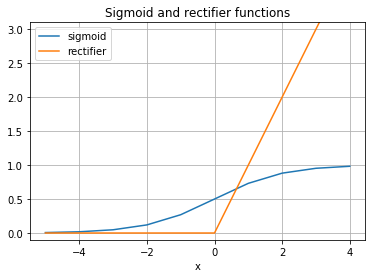

In [24]:
x = np.arange(-5.0, 5.0, 1)
sig = 1/(1+np.exp(-x))
rec = np.maximum(0,x)

fig = plt.figure()
ax = plt.subplot()
ax.plot(x, sig,label='sigmoid')
ax.plot(x, rec,label='rectifier')
ax.legend(loc="best")
plt.grid()
plt.ylim(ymin=-0.1,ymax=3.1)
plt.xlabel('x')
plt.title('Sigmoid and rectifier functions')
plt.show()

<div style="border-bottom: 3px solid black;"></div>

### Exercise 3.2 &ndash; Plot accuracy of finite differences
**Plot the accuracy** of the central difference approximation from Exercise 1.4 for different values of the step size $\epsilon$. Your plot should show that the finite difference approximation breaks down for values of $\epsilon$ that are too large or too small.

Run the code cell below to define functions for $f(x) = x^3$ and its exact first derivative $f'(x) = 3x^2$.

In [25]:
def f(x):
    return x**3

def df_exact(x):
    return 3 * x**2

First, plot the `f` and `f_exact` functions over range $x \in [-1.2, 1.2]$, including title and legend as shown below:
<img src="img/fig-exercise-plot-derivatives-1.png" style="margin-bottom:20px"/>

Second, once you've got the above plot, use your `approx_derivative_of(f, epsilon)` function from Exercise 1.4 to add three new series to your plot, corresponding to $\epsilon=1$, $\epsilon=10^{-8}$ and $\epsilon=10^{-16}$. Your new plot should look like this:
<img src="img/fig-exercise-plot-derivatives-2.png"/>

Make greek symbols like $\epsilon$ in a label or a title by using the dollar sign (\$) and superscript (^), such as `"Argument $\beta$ has value $10^{3}$"` would render in the plot as <span style="border: 1px solid #ddd; padding:3px;">Argument $\beta$ has value $10^3$</span>

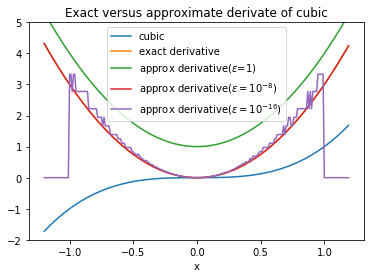

In [28]:
df_approx1,df_approx2,df_approx3 = approx_derivative_of(f,1),approx_derivative_of(f,1e-8),approx_derivative_of(f,1e-16)
x = np.arange(-1.2, 1.2, 0.01)

f1,f2,f3,f4,f5 = f(x),df_exact(x),df_approx1(x),df_approx2(x),df_approx3(x)

plt.plot(x, f1,label='cubic')
plt.plot(x, f2,label='exact derivative')
plt.plot(x, f3,label='approx derivative($\epsilon$=1)')
plt.plot(x, f4,label='approx derivative($\epsilon=10^{-8}$)')
plt.plot(x, f5,label='approx derivative($\epsilon=10^{-16}$)')
plt.legend(loc="best")

plt.ylim(ymin=-2,ymax=5)
plt.xlabel('x')
plt.title('Exact versus approximate derivate of cubic')
plt.show()

<div style="border-bottom: 3px solid black;"></div>

### Exercise 3.3 &ndash; Plot a stack of images

**Stack two images and plot them.** Follow these steps:

1. The lab comes with a file called [mnist-digit-2.png](mnist-digit-2.png). It contains a 32x32 RBG image (red, green, blue colour channels).
2. Use the **plt.[imread](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html)** function the load the file. Notice that the result of _imread_ is an _ndarray_ object of dtype _np.uint8_ and shape (32,32,3).
3. Use the **plt.[imshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html)** function to plot the image. The plot should look like this: <img src="img/fig-exercise-image-digit-2.png" style="height:180px"/>
4. The lab also comes with a file called [mnist-digit-3.png](mnist-digit-3.png). It contains another 32x32 RGB image.
5. Use the **np.[hstack](https://www.numpy.org/devdocs/reference/generated/numpy.hstack.html)** function to create a new image where the digits are side-by-side.
5. Plot new composite image. It should look like this: <img src="img/fig-exercise-image-digit-2-and-3.png" style="height:180px"/>

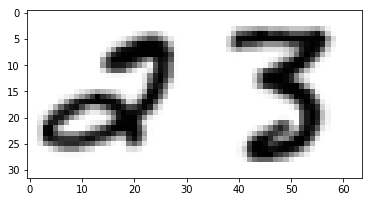

In [27]:
plt.imshow(np.hstack([plt.imread('mnist-digit-2.png'),plt.imread('mnist-digit-3.png')]))
plt.show()